Checkpoint 1
-

### Introduction and Motivation

Goal: To develop a reliable method for predicting milk quality based on easily observable and measurable characteristics. 

Motivation: 
Milk has long been a dietary staple across the world, and its importance is undeniable. As a primary source of essential nutrients like calcium, protein, and vitamins, it plays a crucial role in global nutrition. Over 6 billion people consume milk and dairy products, and global production was around 930 million metric tons in 2022, with India, the European Union, the United States, and China leading the way. Given its widespread consumption, it’s not a surprise that dairy farming is a major factor of many economies, supporting millions of livelihoods. In countries like India, milk is deeply ingrained in daily life, with per capita consumption sitting at around 163 liters per year, while in the U.S., the average person still drinks around 62 liters per year despite shifting dietary trends. And while plant-based alternatives have gained traction, milk remains an irreplaceable component of many diets, particularly in areas where dairy is a key source of nutrition. Simply put, milk's global significance, both nutritionally and economically, speaks for itself.


Given milk’s undeniable global importance, ensuring its quality is just as critical. With billions of people consuming dairy daily, having a reliable and accessible way to assess milk quality is essential for both public health and economic stability. Quality Testing  can often require laboratory analysis, specialized equipment, and trained professionals—resources that may not be readily available in rural areas or developing regions where dairy consumption is high. Contaminated or spoiled milk can pose serious health risks, particularly in places where foodborne illnesses are a concern and proper refrigeration is limited. Additionally, inefficiencies in quality control can lead to significant economic losses for farmers and distributors. By developing an easy-to-use approach for assessing milk quality, we can help bridge this gap, offering a cost-effective solution to ensure safe and high-quality milk reaches consumers around the world.

### Data Description

The chosen dataset was aquired from kaggle.com and procured by Shrijayan Rajendran. Our dataset consists of 1059 entries with 8 columns. The predictors include ph, temperature, taste, odor, fat, turbidity, and color, and the target variable is the quality of the milk. Ph, temperature, and color are numeric, while taste, odor, fat, and turbidity are categorical and binary. Categorical variables are defined as being either "good" or "bad" or "high" or "low". Ph indicates the pH (acidity) of the milk, temperature describes the temperature of the environment the milk was stored in and is in Celsius, and color describes the color of the milk and ranges from 240 to 255 with 255 indicating pure white. Grade (quality of milk), is ordinal: low, medium, and high. Note that Turbidity indicates the cloudiness or haziness of a fluid, caused by suspended particles like fat globules or proteins that are normally invisible to the naked eye. 

This particular set of data was chosen because of its feature's simplicity. This is because the data involves qualities that can be inspected and evaluated just by using ones senses. Understanding each feature does not require sophisticated tools, chemistry expertise, or advanced knowledge of the product. This makes the approach more accessible, especially in regions where testing equipment is unavailable. By relying on observable characteristics such as color and smell, milk quality can be assessed quickly and efficiently, reducing the need for costly or time-consuming laboratory analysis. This simplicity ensures that even individuals without technical expertise can make informed judgments about milk quality, making the method practical for both consumers and small-scale producers. Once the data is properly understood, we hope to produce a method for assessing milk quality that is reproduceable, precise, and easy to implement. 

### Exploratory Data Analysis:

Import Packages Needed for EDA

In [36]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Read the Dataset and Encode variables

In [37]:
df = pd.read_csv('milknew.csv')
unencoded_df = df
df = pd.get_dummies(df, columns=['Taste', 'Odor', 'Fat', 'Turbidity'], drop_first=True)
df['Grade'] = df['Grade'].map({'low': 0, 'medium': 1, 'high': 2})
df

,pH,Temperature,Color,Grade,Taste_1,Odor_1,Fat_1,Turbidity_1
0,6.6,35,254,2,True,False,True,False
1,6.6,36,253,2,False,True,False,True
2,8.5,70,246,0,True,True,True,True
3,9.5,34,255,0,True,True,False,True
4,6.6,37,255,1,False,False,False,False
...,...,...,...,...,...,...,...,...
1054,6.7,45,247,1,True,True,False,False
1055,6.7,38,255,2,True,False,True,False
1056,3.0,40,255,0,True,True,True,True
1057,6.8,43,250,2,True,False,True,False


Summary Statistics

In [38]:
print(df.info())
print(df.describe(include='all'))
print(df.columns)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1059 entries, 0 to 1058
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   pH           1059 non-null   float64
 1   Temperature  1059 non-null   int64  
 2   Color        1059 non-null   int64  
 3   Grade        1059 non-null   int64  
 4   Taste_1      1059 non-null   bool   
 5   Odor_1       1059 non-null   bool   
 6   Fat_1        1059 non-null   bool   
 7   Turbidity_1  1059 non-null   bool   
dtypes: bool(4), float64(1), int64(3)
memory usage: 37.4 KB
None
                 pH  Temperature        Color        Grade Taste_1 Odor_1  \
count   1059.000000  1059.000000  1059.000000  1059.000000    1059   1059   
unique          NaN          NaN          NaN          NaN       2      2   
top             NaN          NaN          NaN          NaN    True  False   
freq            NaN          NaN          NaN          NaN     579    601   
mean       6.630123    4

In [39]:
df.isnull().sum() 

pH             0
Temperature    0
Color          0
Grade          0
Taste_1        0
Odor_1         0
Fat_1          0
Turbidity_1    0
dtype: int64

There are no missing values in our dataset.

### Plotting Continuous Features

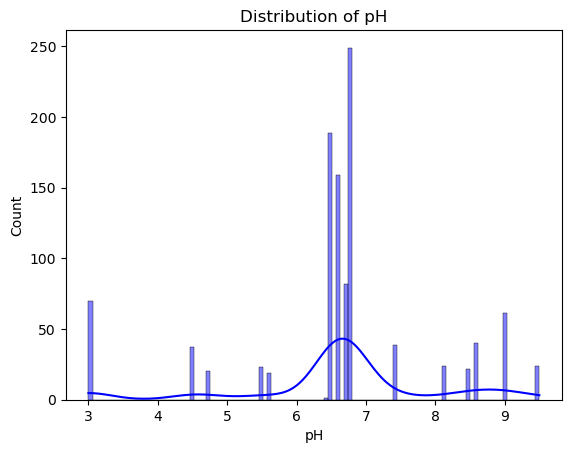

In [41]:
sns.histplot(df['pH'], kde=True, color='blue')
plt.title('Distribution of pH')

plt.show()

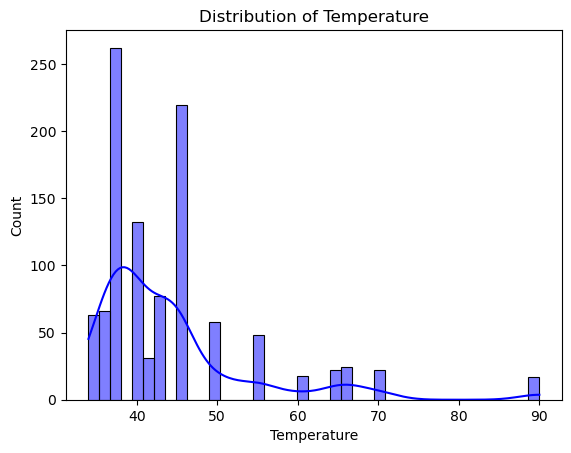

In [42]:
sns.histplot(df['Temperature'], kde=True, color='blue')
plt.title('Distribution of Temperature')

plt.show()

Temperature looks to be rightwardly-skewed, with most values falling between 30 and 50 degrees celsius. This makes sense, as it is unlikely that milk would be stored at temperatures any higher than that unless under very extreme circumstances.

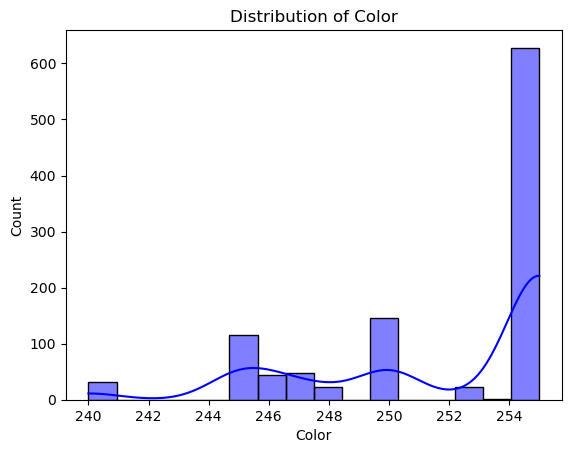

In [43]:
sns.histplot(df['Color'], kde=True, color='blue')
plt.title('Distribution of Color')

plt.show()

Color is skewed left, indicating most of the observed milk is fairly close to pure white. 

### Plotting Categorical Features

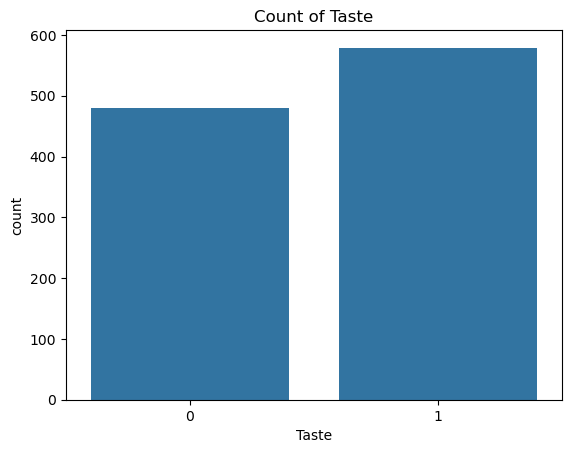

In [45]:
sns.countplot(x='Taste', data=unencoded_df)
plt.title('Count of Taste')

plt.show()

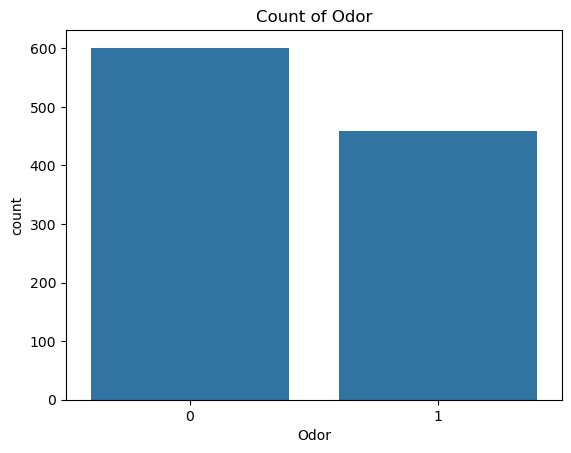

In [46]:
sns.countplot(x='Odor', data=unencoded_df)
plt.title('Count of Odor')

plt.show()

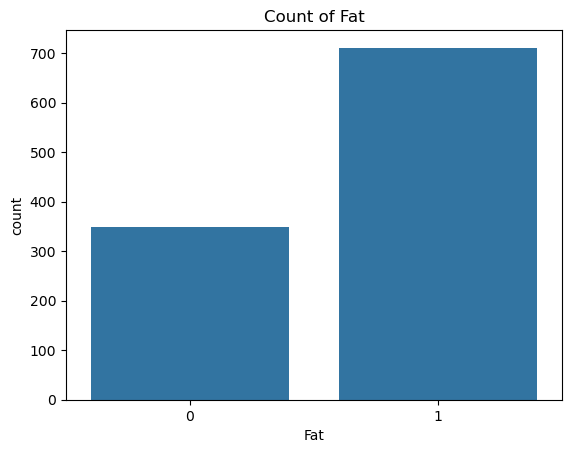

In [47]:
sns.countplot(x='Fat', data=unencoded_df)
plt.title('Count of Fat')

plt.show()

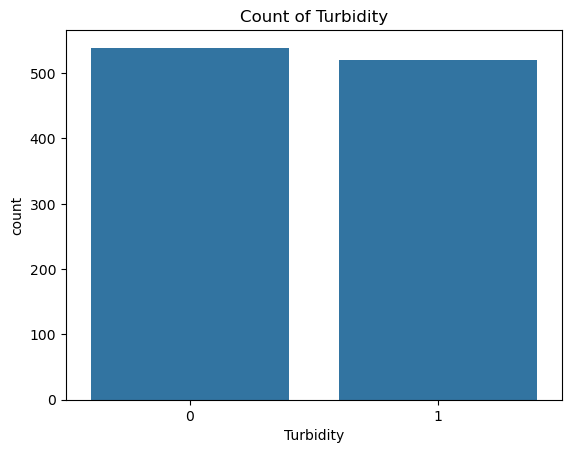

In [48]:
sns.countplot(x='Turbidity', data=unencoded_df)
plt.title('Count of Turbidity')

plt.show()

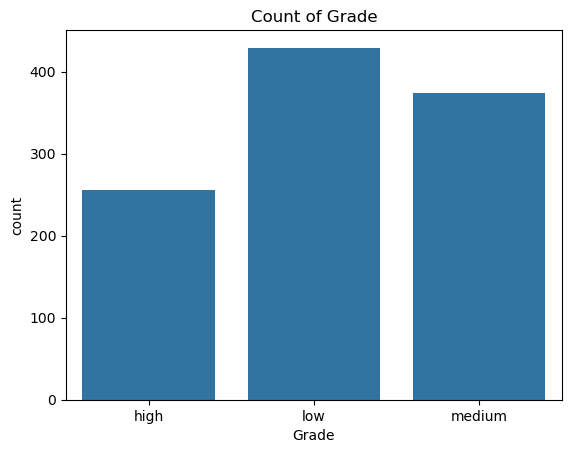

In [49]:
sns.countplot(x='Grade', data=unencoded_df)
plt.title('Count of Grade')

plt.show()

**From our distribution plots we can see a fairly normal distribution of our continuous variables as well as even distributions of categorical variables, with some exceptions. This validates the key assumptions for our classification problem.**

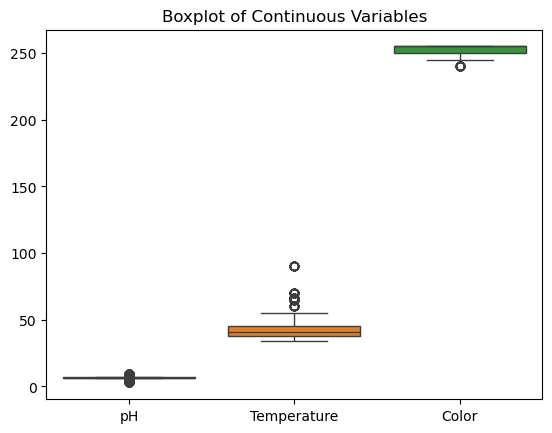

In [50]:
sns.boxplot(data=df[['pH', 'Temperature', 'Color']])
plt.title('Boxplot of Continuous Variables')
plt.show()

The boxplot indicates the presence of outliers. Before our model implementation, we will decide if it is appropriate to remove outliers, potentially adressing them using Jackknife Residuals or Cook's Distance. 

### Analyzing correlation

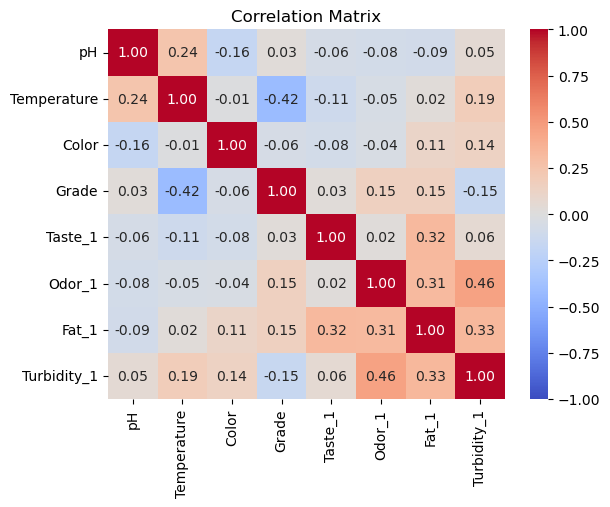

In [52]:
corr_matrix = df.corr()

sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.show()

From our correlation matrix, we can see that color and temperature are the two strongest predictors for grade in terms of correlation. Logically speaking, this seems reasonable given that temperature and color of milk typically change depending on the quality (i.e. temperature and color change when milk gets spoiled). Additionally, we see high correlation between odor and turbidity as well as fat and turbidity. Again this seems reasonable and will likely need to be addressed elsewhere in our analysis. Some ways in which we can address this is implementing interaction terms based on this correlation, removing features, or implement model features like an l1 penalty to reduce the negative effects of multicollinearity by implicit feature selection.

### Partial Residual Plots

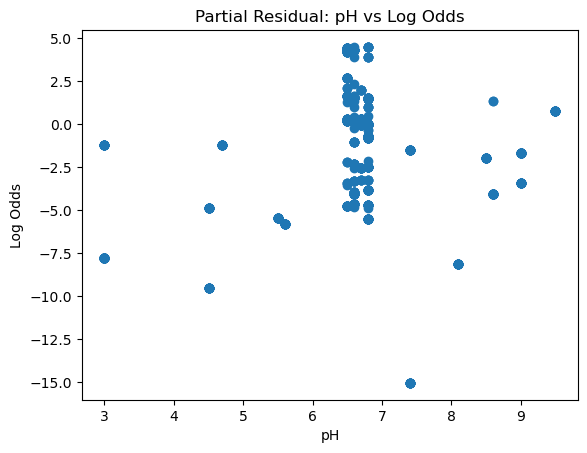

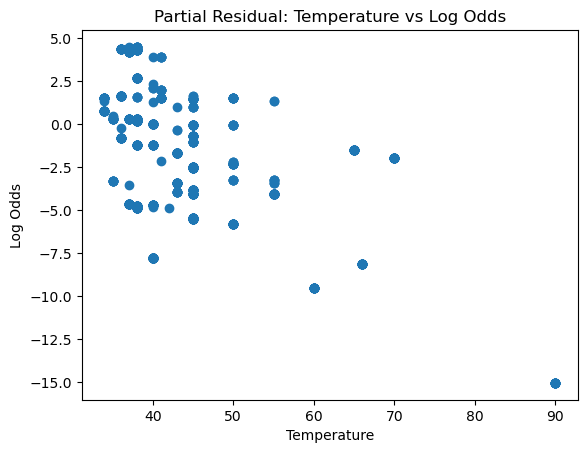

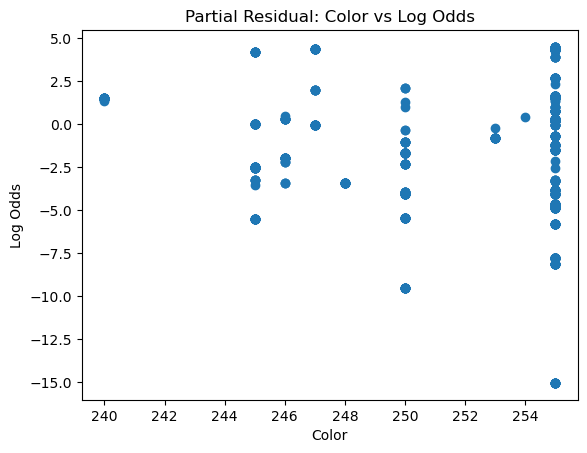

In [88]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

X = df[['pH', 'Temperature', 'Color', 'Taste_1', 'Odor_1', 'Fat_1', 'Turbidity_1']]
y = df['Grade']  

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

continuous_features = ['pH', 'Temperature', 'Color']

log_odds = full_model.predict_proba(X_train)
log_odds = np.log(log_odds[:, 1] / (1 - log_odds[:, 1]))

for feature in continuous_features:
    plt.scatter(X_train[feature], log_odds)
    plt.xlabel(feature)
    plt.ylabel('Log Odds')
    plt.title(f'Partial Residual: {feature} vs Log Odds')

    plt.show()

From the partial residual plots, we can determine that there is a linear relationship between the log odds and our continuous features, as the residuals look to be approximately random around y=0. Moving forward, we will explore transformations to strengthen the linear relationship.

### Future Direction


Moving forward, we plan to expand on our feature engineering and feature selection, data augmentation, and model selection. As of now, we are including all features in our model, however, it is likely that there are certain variables that aren’t necessary for inference and from our correlation matrix, we can see opportunities for interaction terms, specifically between turbidity and odor and fat. We will also experiment with removing taste as a feature as it would be beneficial if we could create a model to predict milk quality without needing to ingest the milk. 
In terms of data augmentation, there are likely better representations of our data that we can experiment with but were unable to explore deeply due to time limitations. After this checkpoint, we will explore applying augmentations and transformations to our data to better strengthen the linear relationship between our features and our log-loss. This will allow us to better represent and predict our data, leading to better results.
In terms of model selection, we don’t plan on deviating from logistic regression with softmax activation. However, we will likely explore implementing slight variations like l1 or l2 penalty terms in order to help assist in combating potential overfitting, multicollinearity, as well as the slight prevalence of outliers highlighted in our boxplots.

### Sources

Data Source: https://www.kaggle.com/datasets/cpluzshrijayan/milkquality/data


Works Cited:\
https://www.lexjansen.com/wuss/2018/130_Final_Paper_PDF.pdf
https://www.researchgate.net/publication/376064637_Milk_Quality_Prediction_Using_Machine_Learning/link/67a9df27207c0c20fa81b7a8/download
https://www.fao.org/dairy-production-products/production/milk-production/en
https://en.wikipedia.org/wiki/List_of_countries_by_milk_consumption_per_capita
https://rankingroyals.com/agriculture/highest-milk-consumption-per-capita-top-185-countries
https://www.oatly.com/things-we-do/initiatives/schoolmilk/global-milk-and-dairy-consumption
https://en.wikipedia.org/wiki/Turbidity

# We, the project teams members, certify that below is an accurate account of the percentage of effort contributed by each team member in the project and report.


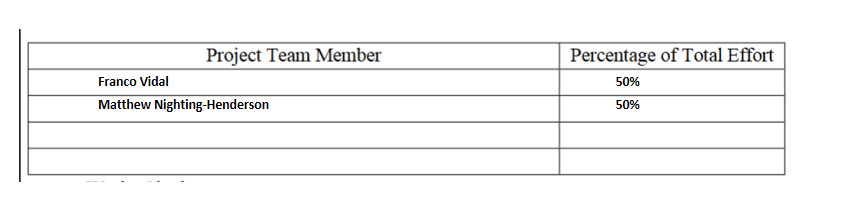
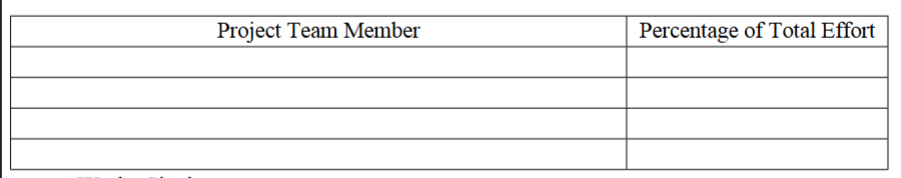